# Both ends fixed scenario from class project, Sauer first edition, and Sauer second edition

## Constants definitions

In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

## Class Project Version

In [2]:
n = 1000; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
A = sparse(N,N); % generating a sparse matrix

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = f(N) = 0;

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Left end
A(1,1) = 1;
A(2,2) = 7;
A(1,2) = 0;
A(1,3) = 0;
A(2,1) = 0;
A(3,1) = 0;
A(2,3) = -4;
A(2,4) = 1;
% Right end
A(N,N) = 1;
A(N-1,N-1) =  7;
A(N-1,N) = 0;
A(N-2,N) = 0;
A(N, N-1) = 0;
A(N, N-2) = 0;
A(N-1,N-2) = -4;
A(N-1,N-3) = 1;

% Solve for y
y = A\f;

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.00000038484


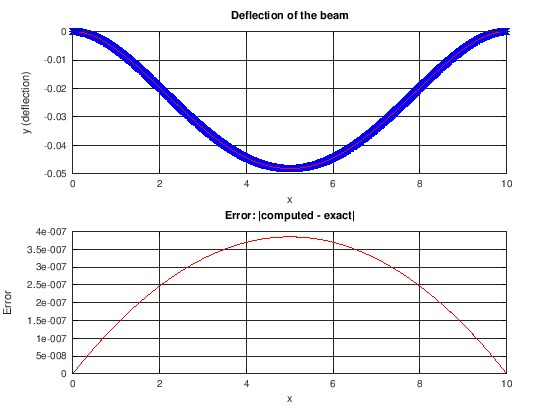

In [19]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer first edition (with -12 on bottom right end)

In [35]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
format short

n = 10; % number of subintervals on [h, L]
h = L/(n+1); % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-2) = (4/3);
A(N,N-1) = -6;
A(N,N) = -12;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;

% Finding y
y = A\f;

% Plots
x = (h:h:L - h)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.012913


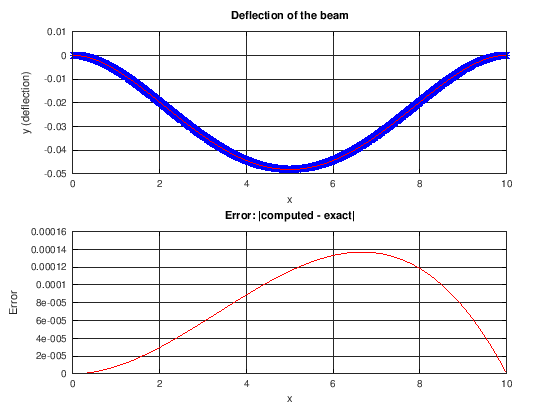

In [27]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer first edition (with +12 on bottom right end)

In [36]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
format short

n = 1000; % number of subintervals on [h, L]
h = L/(n+1); % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);


% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-2) = (4/3);
A(N,N-1) = -6;
A(N,N) = 12;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;

% Finding y
y = A\f;

% Plots
x = (h:h:L - h)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.00000000054156


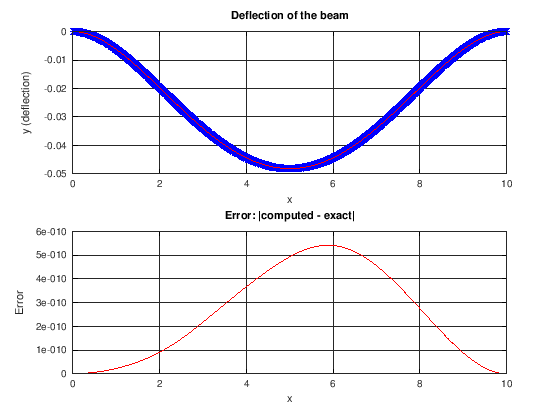

In [29]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer Second Edition

In [21]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.

n = 100; % number of subintervals on [h, L]
h = L/n; % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 16;
A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = -(1/4);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-3) = -(1/4);
A(N,N-2) = (8/3);
A(N,N-1) = 9;
A(N,N) = 16;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;


% Compressing the matrix into a sparse matrix

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.00026333


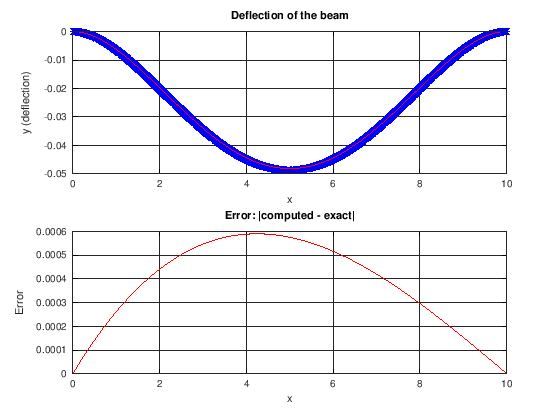

In [42]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

# trial runs (n = 10,20,40,80,160,320,640,1280)

## Class Project Version (trials)

In [3]:
n = 10;

for j=1:11
    n
    h = L/n; % discretization spacing
    N = n + 1; % number of unknowns to be solved for
    A = sparse(N,N); % generating a sparse matrix

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    f(1) = f(N) = 0;

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Left end
    A(1,1) = 1;
    A(2,2) = 7;
    A(1,2) = 0;
    A(1,3) = 0;
    A(2,1) = 0;
    A(3,1) = 0;
    A(2,3) = -4;
    A(2,4) = 1;
    % Right end
    A(N,N) = 1;
    A(N-1,N-1) =  7;
    A(N-1,N) = 0;
    A(N-2,N) = 0;
    A(N, N-1) = 0;
    A(N, N-2) = 0;
    A(N-1,N-2) = -4;
    A(N-1,N-3) = 1;

    % Solve for y
    y = A\f;
    x = (0:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor


n =  10
ErrMax =  0.0038504
n =  20
ErrMax =  0.00096261
n =  40
ErrMax =  0.00024065
n =  80
ErrMax =  0.000060163
n =  160
ErrMax =  0.000015041
n =  320
ErrMax =  0.0000037602
n =  640
ErrMax =  0.00000094006
n =  1280
ErrMax =  0.00000022886
n =  2560
ErrMax =  0.000000088341
n =  5120
ErrMax =  0.00000053402
n =  10240
ErrMax =  0.0000066902


## Sauer 1st Ed. -12 Penta (trials)

In [4]:
n = 10; % number of subintervals on [0, L]

for i = 1:11
    n
    h = L/(n + 1); % discretization spacing

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(n, 1);

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, n);
    dp1 = dm1 = -4*ones(1, n-1);
    dp2 = dm2 = ones(1, n-2);
    % Fixed left end
    d0(1) = 12.0; %d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    %dm1(1) = -4.0;
    %dm2(1) = 1.0;

    d0(n) = -12.0; %d0(n-1) = 6.0;
    %dp1(n-1) = -4.0;
    %dp2(n-2) = 1.0;
    dm1(n-1) = -6.0;
    dm2(n-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots
    x = (h:h:L-h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrMax = max(abs(y-y_exact))
    n = 2*n;

endfor

n =  10
ErrMax =  0.012913
n =  20
ErrMax =  0.0066557
n =  40
ErrMax =  0.0033718
n =  80
ErrMax =  0.0016987
n =  160
ErrMax =    8.5245e-04
n =  320
ErrMax =    4.2703e-04
n =  640
ErrMax =    2.1371e-04
n =  1280
ErrMax =    1.0691e-04
n =  2560
ErrMax =    5.3431e-05
n =  5120
ErrMax =    2.6446e-05
n =  10240
ErrMax =    1.2546e-05


## Sauer 1st Ed. +12 Penta (trials)

In [5]:
n = 10; % number of subintervals on [0, L]

for i = 1:11
    n
    h = L/(n + 1); % discretization spacing

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(n, 1);

    % Define the matrix of the system. Notation: d0 is the main diagonal;
    % dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
    d0 = 6*ones(1, n);
    dp1 = dm1 = -4*ones(1, n-1);
    dp2 = dm2 = ones(1, n-2);
    % Fixed left end
    d0(1) = 12.0; %d0(2) = 6.0;
    dp1(1) = -6.0;
    dp2(1) = (4/3);
    %dm1(1) = -4.0;
    %dm2(1) = 1.0;

    d0(n) = 12.0; %d0(n-1) = 6.0;
    %dp1(n-1) = -4.0;
    %dp2(n-2) = 1.0;
    dm1(n-1) = -6.0;
    dm2(n-2) = (4/3);
    % Solve for y
    y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
    % Plots
    x = (h:h:L-h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrMax = max(abs(y-y_exact))
    n = 2*n;

endfor

n =  10
ErrMax =    4.5103e-17
n =  20
ErrMax =    1.9568e-15
n =  40
ErrMax =    3.1017e-15
n =  80
ErrMax =    2.5144e-13
n =  160
ErrMax =    2.6079e-12
n =  320
ErrMax =    3.5255e-11
n =  640
ErrMax =    2.9305e-10
n =  1280
ErrMax =    2.1994e-10
n =  2560
ErrMax =    4.1388e-08
n =  5120
ErrMax =    4.0065e-07
n =  10240
ErrMax =    1.4277e-06


## Sauer first edition (with -12 on bottom right end) (trials)

In [4]:
n = 10;

for j=1:11
    n
    h = L/(n+1); % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N);

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 12;
    A(1,2) = -6;
    A(1,3) = (4/3);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;
    A(2,4) = 1;

    % Rightside
    A(N,N-2) = (4/3);
    A(N,N-1) = -6;
    A(N,N) = -12;
    A(N-1,N) = A(N-1,N-2) = -4;
    A(N-1,N-1) = 6;
    A(N-1,N-3) = 1;

    % Finding y
    y = A\f;

    % Plots
    x = (h:h:L - h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =  0.012913
n =  20
ErrMax =  0.0066557
n =  40
ErrMax =  0.0033718
n =  80
ErrMax =  0.0016987
n =  160
ErrMax =  0.00085245
n =  320
ErrMax =  0.00042703
n =  640
ErrMax =  0.00021371
n =  1280
ErrMax =  0.00010691
n =  2560
ErrMax =  0.000053459
n =  5120
ErrMax =  0.000026387
n =  10240
ErrMax =  0.000018388


## Sauer first edition (with +12 on bottom right end) (trials)

In [5]:
n = 10;

for j=1:11
    n
    h = L/(n+1); % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N);

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 12;
    A(1,2) = -6;
    A(1,3) = (4/3);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;
    A(2,4) = 1;

    % Rightside
    A(N,N-2) = (4/3);
    A(N,N-1) = -6;
    A(N,N) = 12;
    A(N-1,N) = A(N-1,N-2) = -4;
    A(N-1,N-1) = 6;
    A(N-1,N-3) = 1;

    % Finding y
    y = A\f;

    % Plots
    x = (h:h:L - h)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =   5.5511e-017
n =  20
ErrMax =   1.3531e-016
n =  40
ErrMax =   1.4079e-014
n =  80
ErrMax =   1.5520e-013
n =  160
ErrMax =   2.6629e-013
n =  320
ErrMax =   6.1669e-012
n =  640
ErrMax =  0.00000000012516
n =  1280
ErrMax =  0.0000000026203
n =  2560
ErrMax =  0.0000000070063
n =  5120
ErrMax =  0.00000045617
n =  10240
ErrMax =  0.0000054373


## Sauer Second Edition (trials)

In [6]:
n = 10;

for j=1:11
    n
    h = L/n; % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N);

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 16;
    A(1,2) = -9;
    A(1,3) = (8/3);
    A(1,4) = -(1/4);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;
    A(2,4) = 1;

    % Rightside
    A(N,N-3) = -(1/4);
    A(N,N-2) = (8/3);
    A(N,N-1) = 9;
    A(N,N) = 16;
    A(N-1,N) = A(N-1,N-2) = -4;
    A(N-1,N-1) = 6;
    A(N-1,N-3) = 1;


    % Compressing the matrix into a sparse matrix

    % Finding y
    y = A\f;

    % Plots
    x = (h:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =  0.0050544
n =  20
ErrMax =  0.0013667
n =  40
ErrMax =  0.00061259
n =  80
ErrMax =  0.00032492
n =  160
ErrMax =  0.00016791
n =  320
ErrMax =  0.000085420
n =  640
ErrMax =  0.000043089
n =  1280
ErrMax =  0.000021641
n =  2560
ErrMax =  0.000010835
n =  5120
ErrMax =  0.0000052262
n =  10240
ErrMax =  0.0000066983


# Using the Cosine function

## Class Project Version  (Cos)

In [4]:
n = 1280; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
A = sparse(N,N); % generating a sparse matrix

% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[0:h:L]');
f(1) = f(N) = 0;

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Left end
A(1,1) = 1;
A(2,2) = 7;
A(1,2) = 0;
A(1,3) = 0;
A(2,1) = 0;
A(3,1) = 0;
A(2,3) = -4;
A(2,4) = 1;
% Right end
A(N,N) = 1;
A(N-1,N-1) =  7;
A(N-1,N) = 0;
A(N-2,N) = 0;
A(N, N-1) = 0;
A(N, N-2) = 0;
A(N-1,N-2) = -4;
A(N-1,N-3) = 1;

% Solve for y
y = A\f;

x = (0:h:L)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.0000077895


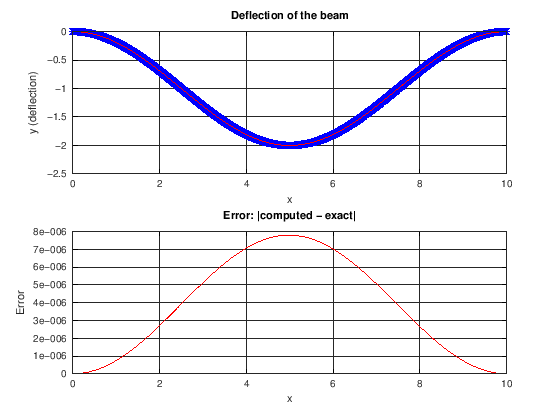

In [5]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer first edition (with -12 on bottom right end)  (Cos)

In [3]:
n = 1000; % number of subintervals on [h, L]
h = L/(n+1); % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L-h]');

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-2) = (4/3);
A(N,N-1) = -6;
A(N,N) = -12;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;

% Finding y
y = A\f;

% Plots
x = (h:h:L - h)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.0035043


In [ ]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer first edition (with +12 on bottom right end)  (Cos)

In [4]:
n = 1000; % number of subintervals on [h, L]
h = L/(n+1); % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L-h]');

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-2) = (4/3);
A(N,N-1) = -6;
A(N,N) = 12;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;

% Finding y
y = A\f;

% Plots
x = (h:h:L - h)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.000013113


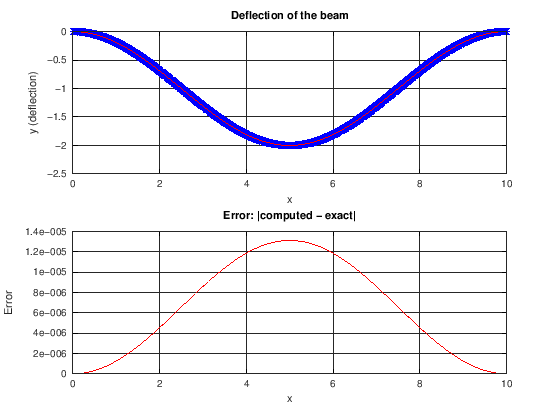

In [5]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer Second Edition (Cos)

In [49]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.

n = 10; % number of subintervals on [h, L]
h = L/n; % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);

% Define the RHS of the system
f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L]');

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 16;
A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = -(1/4);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-3) = -(1/4);
A(N,N-2) = (8/3);
A(N,N-1) = 9;
A(N,N) = 16;
A(N-1,N) = A(N-1,N-2) = -4;
A(N-1,N-1) = 6;
A(N-1,N-3) = 1;


% Compressing the matrix into a sparse matrix

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = cos((pi/5)*x) - 1;
ErrMax = max(abs(y-y_exact))

ErrMax =  0.15214


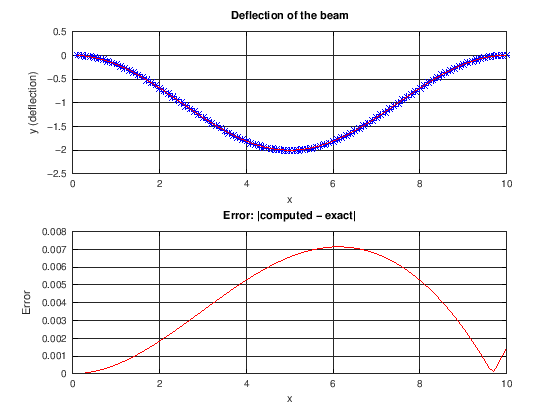

In [48]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

# trial runs (n = 10,20,40,80,160,320,640,1280) for cosine function

## Class Project Version  (Trials) (Cos)

In [10]:
n = 10;

for j=1:11
    n
    h = L/n; % discretization spacing
    N = n + 1; % number of unknowns to be solved for
    A = sparse(N,N); % generating a sparse matrix

    % Define the RHS of the system
    f = h^4*(pi/5)^4*cos((pi/5)*[0:h:L]');
    f(1) = f(N) = 0;

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Left end
    A(1,1) = 1;
    A(2,2) = 7;
    A(1,2) = 0;
    A(1,3) = 0;
    A(2,1) = 0;
    A(3,1) = 0;
    A(2,3) = -4;
    A(2,4) = 1;
    % Right end
    A(N,N) = 1;
    A(N-1,N-1) =  7;
    A(N-1,N) = 0;
    A(N-2,N) = 0;
    A(N, N-1) = 0;
    A(N, N-2) = 0;
    A(N-1,N-2) = -4;
    A(N-1,N-3) = 1;

    % Solve for y
    y = A\f;
    x = (0:h:L)';
    y_exact = cos((pi/5)*x) - 1;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =  0.13649
n =  20
ErrMax =  0.033198
n =  40
ErrMax =  0.0082433
n =  80
ErrMax =  0.0020573
n =  160
ErrMax =  0.00051411
n =  320
ErrMax =  0.00012852
n =  640
ErrMax =  0.000032128
n =  1280
ErrMax =  0.0000077895
n =  2560
ErrMax =  0.0000032966
n =  5120
ErrMax =  0.000023116
n =  10240
ErrMax =  0.00028508


## Sauer first edition (with -12 on bottom right end) (Trials) (Cos)

In [7]:
n = 10;

for j=1:11
    n
    h = L/(n+1); % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N);

    % Define the RHS of the system
    f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L-h]');

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 12;
    A(1,2) = -6;
    A(1,3) = (4/3);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;
    A(2,4) = 1;

    % Rightside
    A(N,N-2) = (4/3);
    A(N,N-1) = -6;
    A(N,N) = -12;
    A(N-1,N) = A(N-1,N-2) = -4;
    A(N-1,N-1) = 6;
    A(N-1,N-3) = 1;

    % Finding y
    y = A\f;

    % Plots
    x = (h:h:L - h)';
    y_exact = cos((pi/5)*x) - 1;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =  0.33916
n =  20
ErrMax =  0.16808
n =  40
ErrMax =  0.085329
n =  80
ErrMax =  0.043177
n =  160
ErrMax =  0.021750
n =  320
ErrMax =  0.010919
n =  640
ErrMax =  0.0054712
n =  1280
ErrMax =  0.0027386
n =  2560
ErrMax =  0.0013697
n =  5120
ErrMax =  0.00067078
n =  10240
ErrMax =  0.00054537


## Sauer first edition (with +12 on bottom right end) (Trials) (Cos)

In [8]:
n = 10;

for j=1:11
    n
    h = L/(n+1); % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N);

    % Define the RHS of the system
    f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L-h]');

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 12;
    A(1,2) = -6;
    A(1,3) = (4/3);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;
    A(2,4) = 1;

    % Rightside
    A(N,N-2) = (4/3);
    A(N,N-1) = -6;
    A(N,N) = 12;
    A(N-1,N) = A(N-1,N-2) = -4;
    A(N-1,N-1) = 6;
    A(N-1,N-3) = 1;

    % Finding y
    y = A\f;

    % Plots
    x = (h:h:L - h)';
    y_exact = cos((pi/5)*x) - 1;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =  0.10597
n =  20
ErrMax =  0.029763
n =  40
ErrMax =  0.0078282
n =  80
ErrMax =  0.0020059
n =  160
ErrMax =  0.00050769
n =  320
ErrMax =  0.00012771
n =  640
ErrMax =  0.000032032
n =  1280
ErrMax =  0.0000079125
n =  2560
ErrMax =  0.0000022028
n =  5120
ErrMax =  0.000019341
n =  10240
ErrMax =  0.00021759


## Sauer Second Edition (Trials) (Cos)

In [9]:
n = 10;

for j=1:11
    n
    h = L/n; % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N);

    % Define the RHS of the system
    f = h^4*(pi/5)^4*cos((pi/5)*[h:h:L]');

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 16;
    A(1,2) = -9;
    A(1,3) = (8/3);
    A(1,4) = -(1/4);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;
    A(2,4) = 1;

    % Rightside
    A(N,N-3) = -(1/4);
    A(N,N-2) = (8/3);
    A(N,N-1) = 9;
    A(N,N) = 16;
    A(N-1,N) = A(N-1,N-2) = -4;
    A(N-1,N-1) = 6;
    A(N-1,N-3) = 1;


    % Compressing the matrix into a sparse matrix

    % Finding y
    y = A\f;

    % Plots
    x = (h:h:L)';
    y_exact = cos((pi/5)*x) - 1;
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =  0.15214
n =  20
ErrMax =  0.044239
n =  40
ErrMax =  0.018924
n =  80
ErrMax =  0.0089724
n =  160
ErrMax =  0.0044372
n =  320
ErrMax =  0.0022189
n =  640
ErrMax =  0.0011113
n =  1280
ErrMax =  0.00055637
n =  2560
ErrMax =  0.00027799
n =  5120
ErrMax =  0.00013089
n =  10240
ErrMax =  0.00024635


In [14]:
h = 1
x = (h:h:L)'

h =  1
x =

    1
    2
    3
    4
    5
    6
    7
    8
    9
   10

